# Initialization

In [1]:
# Load dependencies
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas_datareader import wb
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Set the style for the plot
sns.set(style="whitegrid")

In [3]:
# Ingest data
df = pd.read_csv('../input/covid-vaccinations-2023/CovidVaccinations2023.csv')
# Drop the global aggregate row
df = df[df['Country'] != 'World']
# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)
df

,Country,Vaccinated,FullyVaccinated,AdditionalDosesPer100people,AdditionalDosesTotal,DosesAdministeredPer100people,DosesAdministeredTotal
0,Macau,>99%,>99%,76,477572,285.0,1797836
1,Brunei,>99%,>99%,78,340030,298.0,1289036
2,U.A.E.,>99%,>99%,53,5138699,255.0,24922054
3,Qatar,>99%,>99%,67,1903612,269.0,7606840
4,Samoa,97.00%,90.00%,42,82117,230.0,452831
...,...,...,...,...,...,...,...
182,Madagascar,8.6%,8.3%,0,126788,9.8,2652348
183,Papua New Guinea,4.2%,3.6%,0,32902,8.2,717736
184,Haiti,3.60%,2.10%,–,–,4.6,515718
185,Yemen,3.5%,2.6%,0,61249,4.3,1255304


# Data pre-processing

In [4]:
# Replace "–" with " " and ">99%" with "99%" in selected columns
columns_to_replace = ["Vaccinated", "FullyVaccinated", "AdditionalDosesPer100people", "AdditionalDosesTotal"]
df[columns_to_replace] = df[columns_to_replace].replace({"–": " ", ">99%": "99%"})
df

,Country,Vaccinated,FullyVaccinated,AdditionalDosesPer100people,AdditionalDosesTotal,DosesAdministeredPer100people,DosesAdministeredTotal
0,Macau,99%,99%,76,477572,285.0,1797836
1,Brunei,99%,99%,78,340030,298.0,1289036
2,U.A.E.,99%,99%,53,5138699,255.0,24922054
3,Qatar,99%,99%,67,1903612,269.0,7606840
4,Samoa,97.00%,90.00%,42,82117,230.0,452831
...,...,...,...,...,...,...,...
182,Madagascar,8.6%,8.3%,0,126788,9.8,2652348
183,Papua New Guinea,4.2%,3.6%,0,32902,8.2,717736
184,Haiti,3.60%,2.10%,,,4.6,515718
185,Yemen,3.5%,2.6%,0,61249,4.3,1255304


In [5]:
# Split columns containing percentage values, remove "%" and convert to numeric
percentage_columns = ["Vaccinated", "FullyVaccinated"]
for col in percentage_columns:
    df[col] = df[col].str.rstrip("%")
    df[col] = pd.to_numeric(df[col])
    df[col] /= 100
df

,Country,Vaccinated,FullyVaccinated,AdditionalDosesPer100people,AdditionalDosesTotal,DosesAdministeredPer100people,DosesAdministeredTotal
0,Macau,0.990,0.990,76,477572,285.0,1797836
1,Brunei,0.990,0.990,78,340030,298.0,1289036
2,U.A.E.,0.990,0.990,53,5138699,255.0,24922054
3,Qatar,0.990,0.990,67,1903612,269.0,7606840
4,Samoa,0.970,0.900,42,82117,230.0,452831
...,...,...,...,...,...,...,...
182,Madagascar,0.086,0.083,0,126788,9.8,2652348
183,Papua New Guinea,0.042,0.036,0,32902,8.2,717736
184,Haiti,0.036,0.021,,,4.6,515718
185,Yemen,0.035,0.026,0,61249,4.3,1255304


In [6]:
# Convert selected columns to numeric after removing commas
numeric_columns = ["AdditionalDosesPer100people", "AdditionalDosesTotal"]
df[numeric_columns] = df[numeric_columns].replace({",": ""}, regex=True).apply(pd.to_numeric, errors="coerce")
df

,Country,Vaccinated,FullyVaccinated,AdditionalDosesPer100people,AdditionalDosesTotal,DosesAdministeredPer100people,DosesAdministeredTotal
0,Macau,0.990,0.990,76.0,477572.0,285.0,1797836
1,Brunei,0.990,0.990,78.0,340030.0,298.0,1289036
2,U.A.E.,0.990,0.990,53.0,5138699.0,255.0,24922054
3,Qatar,0.990,0.990,67.0,1903612.0,269.0,7606840
4,Samoa,0.970,0.900,42.0,82117.0,230.0,452831
...,...,...,...,...,...,...,...
182,Madagascar,0.086,0.083,0.0,126788.0,9.8,2652348
183,Papua New Guinea,0.042,0.036,0.0,32902.0,8.2,717736
184,Haiti,0.036,0.021,NaN,NaN,4.6,515718
185,Yemen,0.035,0.026,0.0,61249.0,4.3,1255304


In [7]:
df[['Vaccinated', 'FullyVaccinated']] = df[['Vaccinated', 'FullyVaccinated']] * 100

df

,Country,Vaccinated,FullyVaccinated,AdditionalDosesPer100people,AdditionalDosesTotal,DosesAdministeredPer100people,DosesAdministeredTotal
0,Macau,99.0,99.0,76.0,477572.0,285.0,1797836
1,Brunei,99.0,99.0,78.0,340030.0,298.0,1289036
2,U.A.E.,99.0,99.0,53.0,5138699.0,255.0,24922054
3,Qatar,99.0,99.0,67.0,1903612.0,269.0,7606840
4,Samoa,97.0,90.0,42.0,82117.0,230.0,452831
...,...,...,...,...,...,...,...
182,Madagascar,8.6,8.3,0.0,126788.0,9.8,2652348
183,Papua New Guinea,4.2,3.6,0.0,32902.0,8.2,717736
184,Haiti,3.6,2.1,NaN,NaN,4.6,515718
185,Yemen,3.5,2.6,0.0,61249.0,4.3,1255304


In [8]:
df.dtypes

Country                           object
Vaccinated                       float64
FullyVaccinated                  float64
AdditionalDosesPer100people      float64
AdditionalDosesTotal             float64
DosesAdministeredPer100people    float64
DosesAdministeredTotal             int64
dtype: object

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Vaccinated,187.0,6.093690e+01,2.475924e+01,0.3,42.5,65.0,82.0,9.900000e+01
FullyVaccinated,187.0,5.559733e+01,2.489902e+01,0.3,35.0,57.0,76.0,9.900000e+01
AdditionalDosesPer100people,171.0,3.330409e+01,3.068859e+01,0.0,7.0,25.0,56.0,1.450000e+02
AdditionalDosesTotal,171.0,1.588370e+07,6.833371e+07,291.0,200409.5,1457469.0,7140521.5,8.269130e+08
DosesAdministeredPer100people,187.0,1.435786e+02,8.263419e+01,0.3,72.5,142.0,207.5,3.850000e+02
DosesAdministeredTotal,187.0,7.095323e+07,3.098285e+08,34493.0,1968188.0,9857575.0,30645623.0,3.491077e+09


# Data visualization

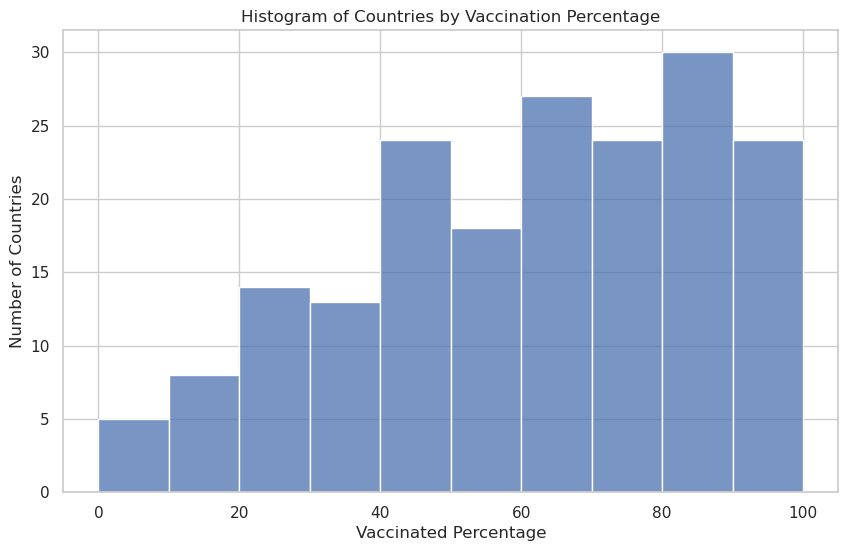

In [10]:
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Vaccinated', bins=np.arange(0, 101, 10), kde=False)
plt.title('Histogram of Countries by Vaccination Percentage')
plt.xlabel('Vaccinated Percentage')
plt.ylabel('Number of Countries')

# Show the plot
plt.show()

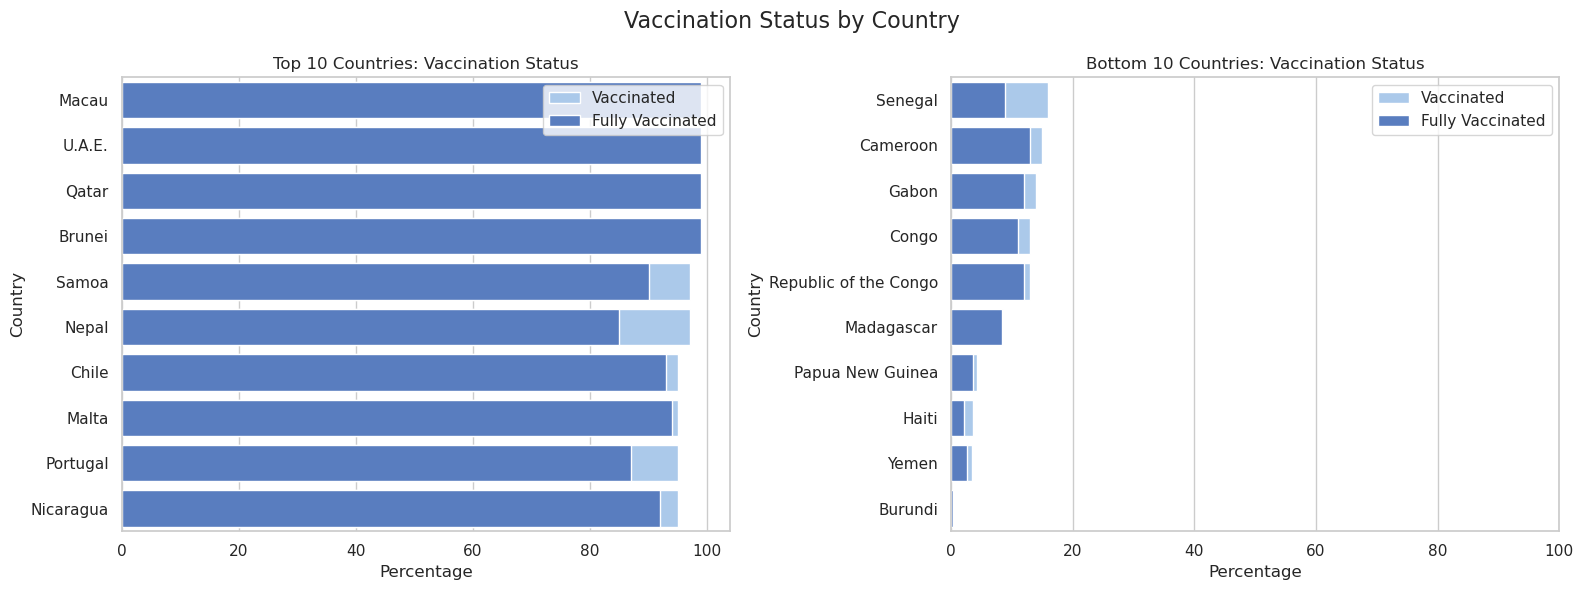

In [11]:
# Sort the DataFrame by the 'Vaccinated' column in descending order
df_sorted = df.sort_values(by='Vaccinated', ascending=False)

# Drop rows with missing data in the specified columns
df_sorted_cleaned = df_sorted.dropna(subset=['Vaccinated', 'FullyVaccinated'])
# Divide the DataFrame into top 10 and bottom 10
top_10 = df_sorted.head(10)
bottom_10 = df_sorted.tail(10)

# Set the style for the plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 2 column 1 row structure

# Add the overall title
fig.suptitle("Vaccination Status by Country", fontsize=16)

# Create the top 10 bar plot with descending order
sns.set_color_codes("pastel")
sns.barplot(x='Vaccinated', y='Country', data=top_10, color='b', ax=axes[0], label='Vaccinated')
sns.set_color_codes("muted")
sns.barplot(x='FullyVaccinated', y='Country', data=top_10, color='b', ax=axes[0], label='Fully Vaccinated')

# Labeling and formatting for top 10
axes[0].set_xlabel('Percentage')
axes[0].set_ylabel('Country')
axes[0].set_title('Top 10 Countries: Vaccination Status')
axes[0].legend()

# Create the bottom 10 bar plot with descending order
sns.set_color_codes("pastel")
sns.barplot(x='Vaccinated', y='Country', data=bottom_10, color='b', ax=axes[1], label='Vaccinated')
sns.set_color_codes("muted")
sns.barplot(x='FullyVaccinated', y='Country', data=bottom_10, color='b', ax=axes[1], label='Fully Vaccinated')

# Labeling and formatting for bottom 10
axes[1].set_xlabel('Percentage')
axes[1].set_ylabel('Country')
axes[1].set_title('Bottom 10 Countries: Vaccination Status')
axes[1].legend()
axes[1].set_xlim(0, 100)


# Adjust layout and show the plots
plt.tight_layout()
plt.show()

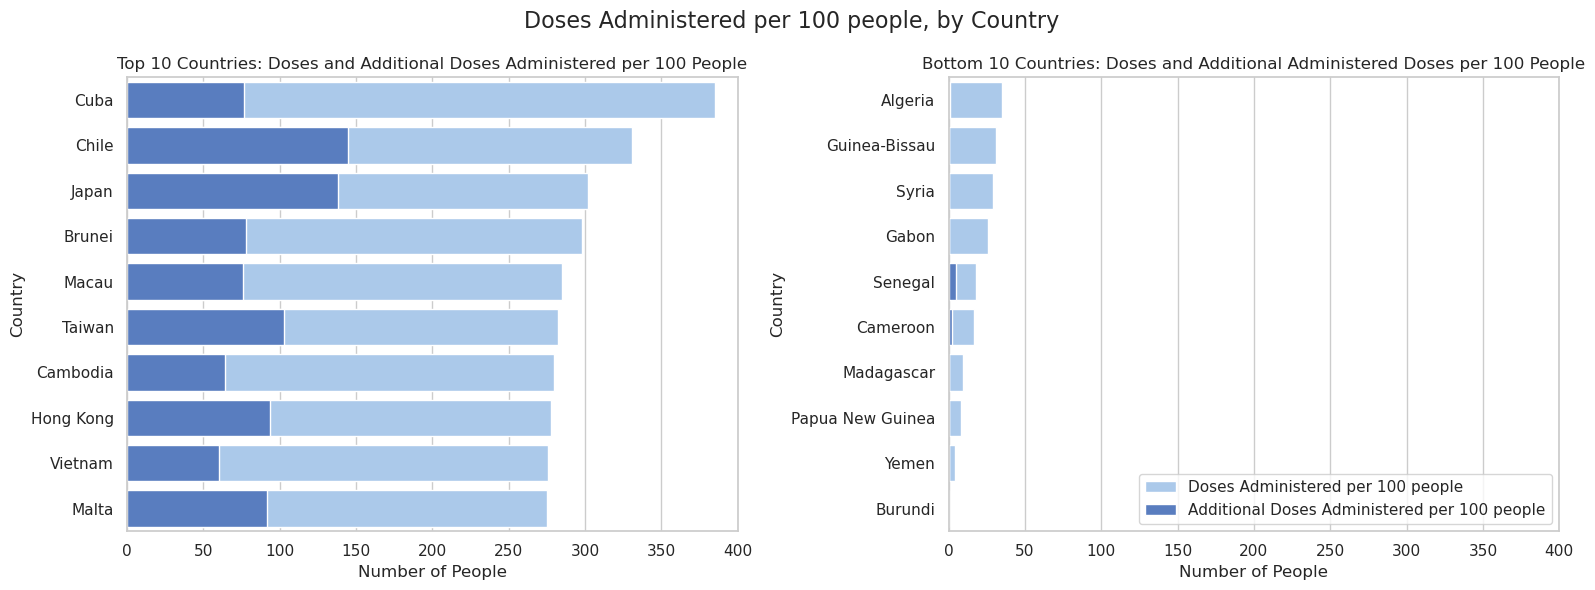

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by the 'DosesAdministeredPer100people' column in descending order
df_sorted = df.sort_values(by='DosesAdministeredPer100people', ascending=False)

# Drop rows with missing data in the specified columns
df_sorted_cleaned = df_sorted.dropna(subset=['DosesAdministeredPer100people', 'AdditionalDosesPer100people'])

# Divide the cleaned DataFrame into top 10 and bottom 10
top_10 = df_sorted_cleaned.head(10)
bottom_10 = df_sorted_cleaned.tail(10)

# Set the style for the plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row 2 columns structure

# Add the overall title
fig.suptitle("Doses Administered per 100 people, by Country", fontsize=16)

# Create individual bar plots for top 10 countries
sns.set_color_codes("pastel")
sns.barplot(x='DosesAdministeredPer100people', y='Country', data=top_10, color='b', ax=axes[0], label="Doses Administered per 100 people")
sns.set_color_codes("muted")
sns.barplot(x='AdditionalDosesPer100people', y='Country', data=top_10, color='b', ax=axes[0], label = "Additional Doses Administered per 100 people")



# Create individual bar plots for bottom 10 countries
sns.set_color_codes("pastel")
sns.barplot(x='DosesAdministeredPer100people', y='Country', data=bottom_10, color='b', ax=axes[1], label="Doses Administered per 100 people")
sns.set_color_codes("muted")
sns.barplot(x='AdditionalDosesPer100people', y='Country', data=bottom_10, color='b', ax=axes[1], label = "Additional Doses Administered per 100 people")

# Set x-axis label for all plots
for ax in axes.flatten():
    ax.set_xlabel('Number of People')

# Set titles for each plot
axes[0].set_title('Top 10 Countries: Doses and Additional Doses Administered per 100 People')
axes[1].set_title('Bottom 10 Countries: Doses and Additional Administered Doses per 100 People')
axes[1].legend(loc='lower right')  # Set legend position for the second plot
axes[0].set_xlim(0, 400)
axes[1].set_xlim(0, 400)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


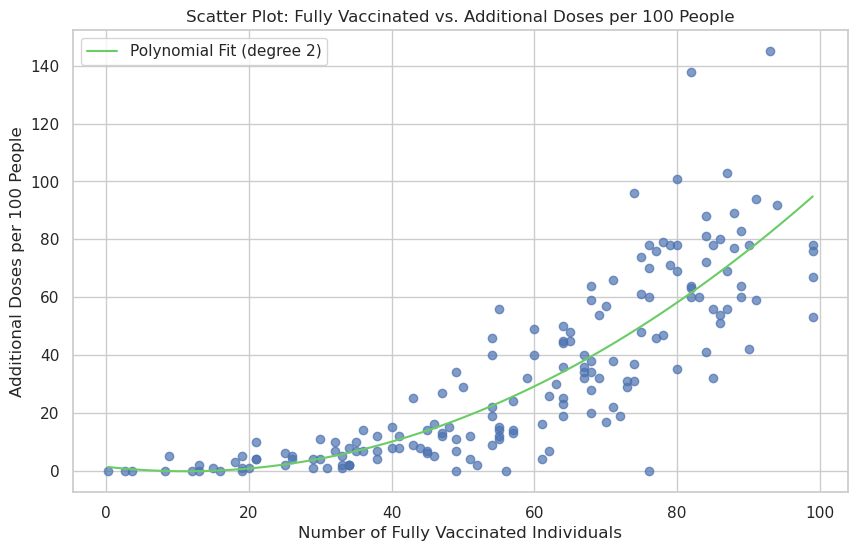

In [13]:
# Remove rows with missing values
df_cleaned = df.dropna(subset=['FullyVaccinated', 'AdditionalDosesPer100people'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['FullyVaccinated'], df_cleaned['AdditionalDosesPer100people'], alpha=0.7)
plt.title('Scatter Plot: Fully Vaccinated vs. Additional Doses per 100 People')
plt.xlabel('Number of Fully Vaccinated Individuals')
plt.ylabel('Additional Doses per 100 People')
plt.grid(True)

# Fit a polynomial regression line
degree = 2  # Degree of the polynomial (1 for linear regression)
coefficients = np.polyfit(df_cleaned['FullyVaccinated'], df_cleaned['AdditionalDosesPer100people'], degree)
polynomial = np.poly1d(coefficients)

# Generate x values for the fitted line
x_vals = np.linspace(df_cleaned['FullyVaccinated'].min(), df_cleaned['FullyVaccinated'].max(), num=100)

# Calculate corresponding y values using the polynomial
y_vals = polynomial(x_vals)

# Plot the polynomial fit line
plt.plot(x_vals, y_vals, color='g', label=f'Polynomial Fit (degree {degree})')
plt.legend()

plt.show()

/tmp/ipykernel_20/2037062308.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


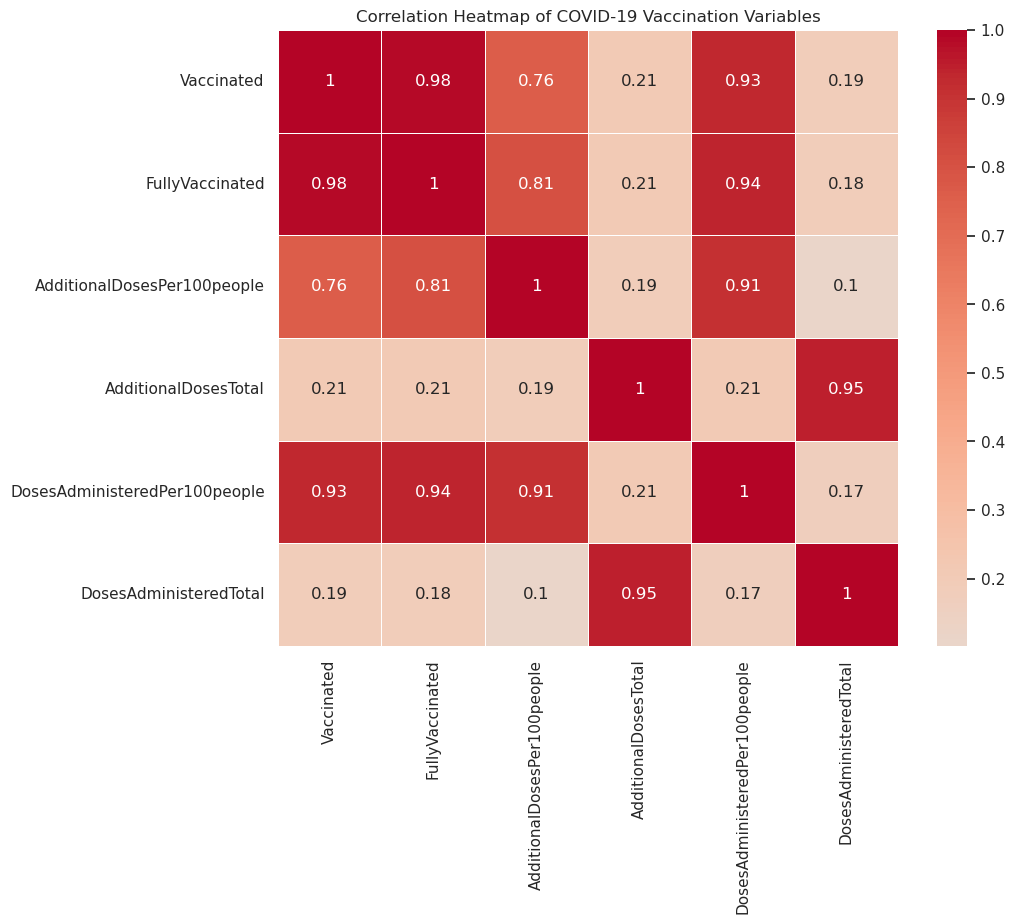

In [14]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

# Set the title of the heatmap
plt.title('Correlation Heatmap of COVID-19 Vaccination Variables')

# Show the plot
plt.show()


In [15]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [16]:
world = gpd.read_file('../input/world-shapefile/ne_50m_admin_0_countries.shp')

In [17]:
merged_data = world.merge(df, left_on='SOVEREIGNT', right_on='Country', how='left')


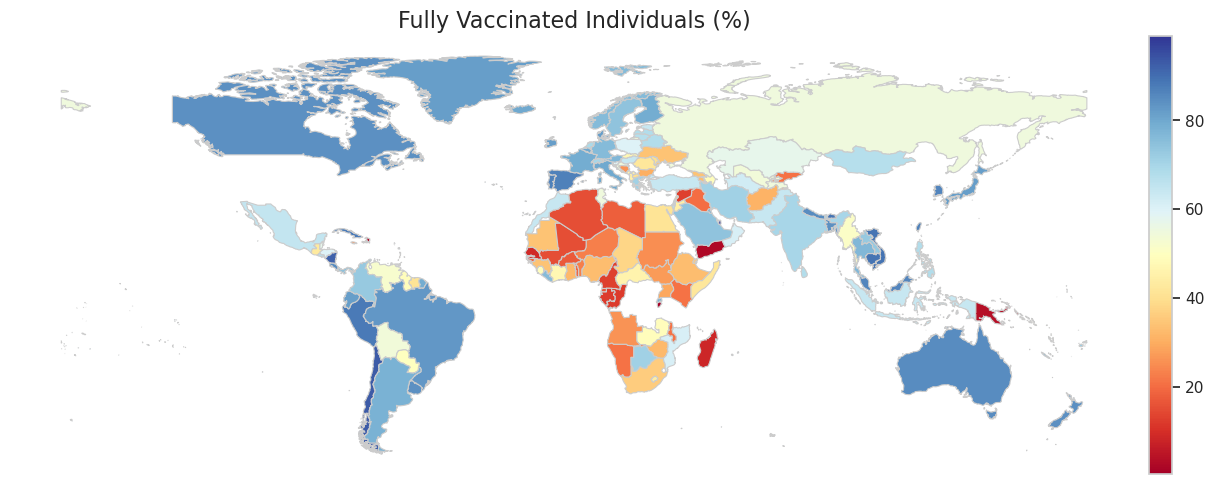

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)  # Adjust the size parameter

merged_data.plot(column='FullyVaccinated', cmap='RdYlBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)

ax.set_title('Fully Vaccinated Individuals (%)', fontdict={'fontsize': '16', 'fontweight' : '3'})

ax.set_axis_off()
plt.show()


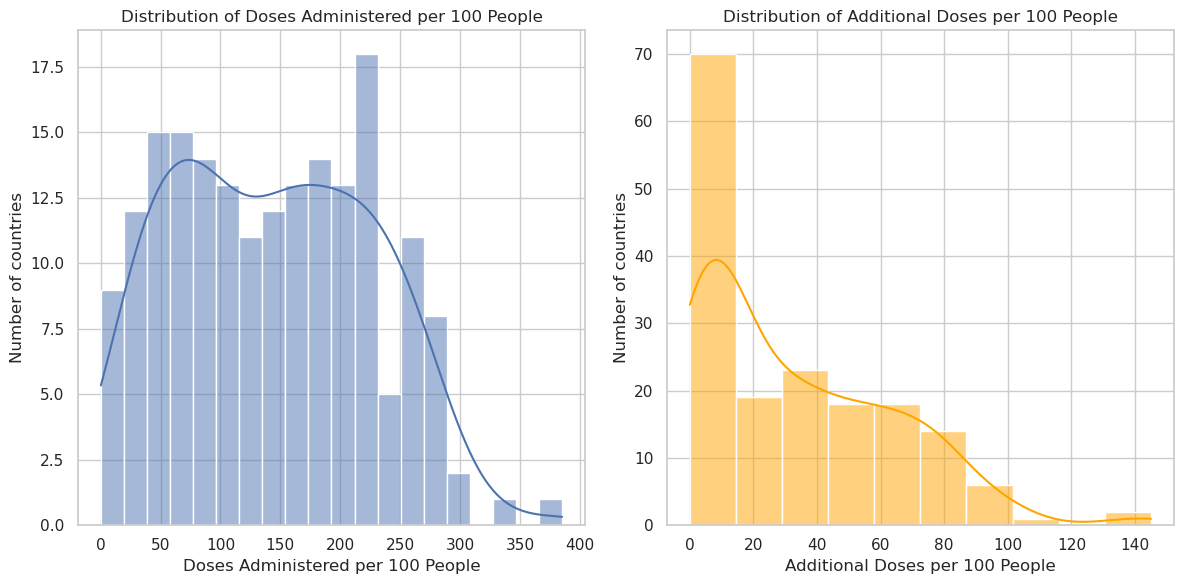

In [19]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create histogram for doses administered per 100 people
sns.histplot(data=df, x='DosesAdministeredPer100people', bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Doses Administered per 100 People')
axes[0].set_xlabel('Doses Administered per 100 People')
axes[0].set_ylabel('Number of countries')

# Create histogram for additional doses per 100 people
sns.histplot(data=df, x='AdditionalDosesPer100people', bins=10, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Distribution of Additional Doses per 100 People')
axes[1].set_xlabel('Additional Doses per 100 People')
axes[1].set_ylabel('Number of countries')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

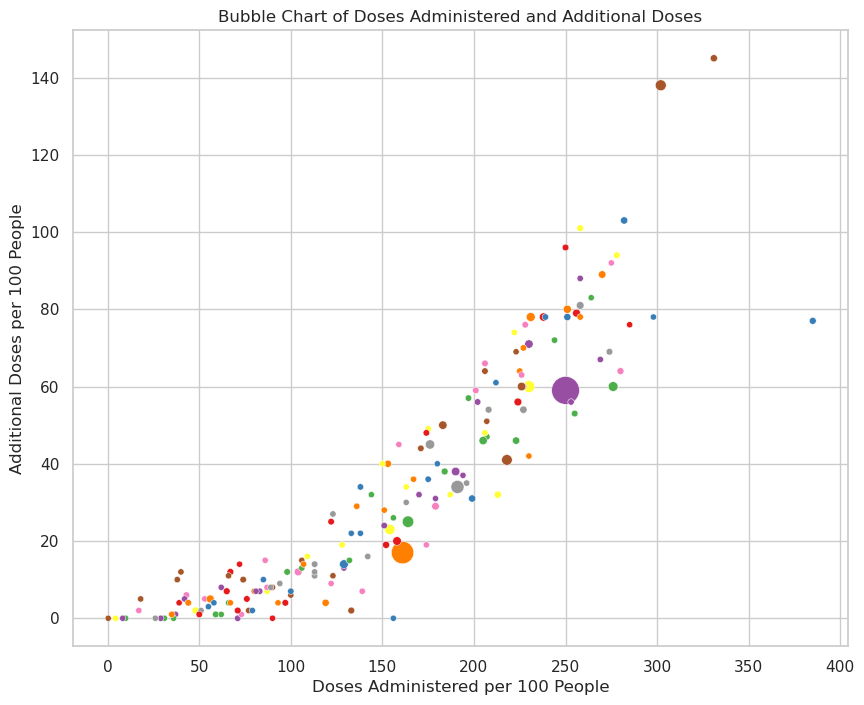

In [20]:
# Create the bubble chart
plt.figure(figsize=(10, 8))
sns.scatterplot(x='DosesAdministeredPer100people', y='AdditionalDosesPer100people', size='DosesAdministeredTotal', data=df, sizes=(20, 400), hue='Country', palette='Set1', legend = False)
plt.title('Bubble Chart of Doses Administered and Additional Doses')
plt.xlabel('Doses Administered per 100 People')
plt.ylabel('Additional Doses per 100 People')

# Show the plot
plt.show()